For this notebook, I'll be predicting whether breast cancer is malignant or benign based on a series of features regarding the shape, size, density, etc. of the tumor.

original data link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data 

In [1]:
import sys
sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_utils import split_dataset
from models import GaussianNaiveBayesClassifer

In [2]:
# load data as pandas dataframe
filename = 'datasets/breast_cancer_wisconsin_diagnosis.csv'
df = pd.read_csv(filename, index_col='id')
df.drop(labels='Unnamed: 32', axis=1, inplace=True) # remove dummy column

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [5]:
# obtain features
X = df.drop('diagnosis', axis=1).values
X.shape

(569, 30)

In [6]:
# map M and B characters to 1 and 0 so my model can use them
diagnosis_to_number_map = {'M': 1, 'B': 0}
diagnosis_to_number_map

{'M': 1, 'B': 0}

In [7]:
y = np.array(df['diagnosis'].apply(lambda diagnosis_letter: diagnosis_to_number_map[diagnosis_letter]))
y.shape

(569,)

In [8]:
# invert mapping
number_to_diagnosis_map = {v: k for k, v in diagnosis_to_number_map.items()}
number_to_diagnosis_map

{1: 'M', 0: 'B'}

In [9]:
# making sure I converted diagnosis to number correctly by reversing the process
assert np.all([number_to_diagnosis_map[val] for val in y] == list(df.diagnosis))

Text(0.5, 1.0, 'Pearson Correlation Coefficients for Breast Cancer Dataset')

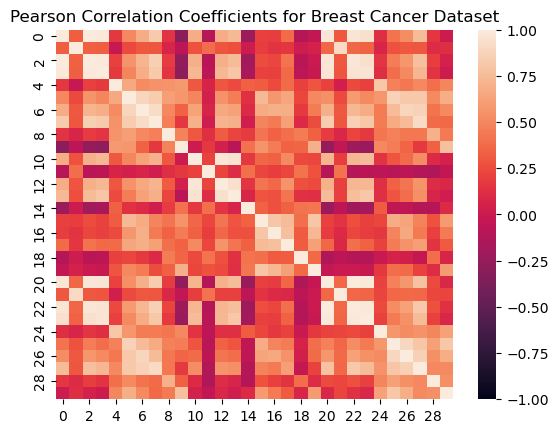

In [10]:
# visual check for multicollinearity
sns.heatmap(np.corrcoef(X.T), vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficients for Breast Cancer Dataset')

In [11]:
# split dataset into train and test sets
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

In [12]:
# fit model to training data, then evaluate on test data
model = GaussianNaiveBayesClassifer()
model.fit(X_train, y_train)

accuracy = model.accuracy(X_test, y_test)
precision = model.precision(X_test, y_test)
recall = model.recall(X_test, y_test)
f1_score = model.f1_score(X_test, y_test)

print(f'''Test accuracy: {accuracy}
Test precision: {precision}
Test recall: {recall}
Test f1_score: {f1_score}''')

Test accuracy: 0.9298245614035088
Test precision: 0.8666666666666667
Test recall: 0.9512195121951219
Test f1_score: 0.9069767441860465


Overall, these numbers are great for a classification model.

Accuracy is what you think it means :)

Precision indicates that when the model predicts that a tumor is malignant, it is expected to be correct 90.4 % of the time

Precision indicates that when a tumor is malignant, the model is expected to correctly predict that it is malignant 95 % of the time

F1 is just the harmonic mean of precision and recall, so a value close to 1 is good.

# Principal Component Analysis (because why not if I've already built it)

Because there was some clear multicollinearity in our data, I'll try PCA to perform dimensionality reduction.

I'm not sure how desirable this is here; since we're presumably building a model that would be used in a medical setting, I would think we'd want to have the original, interpretable features. Nevertheless, I'll try this out anyways. 

In [13]:
from models import PCA

In [14]:
pca = PCA(num_components=15)

In [15]:
# fit pca to training data and then transform both train and test
X_train_transformed = pca.fit_transform(X_train)

X_test_transformed = pca.transform(X_test)

In [16]:
model = GaussianNaiveBayesClassifer()
model.fit(X_train_transformed, y_train)

accuracy = model.accuracy(X_test_transformed, y_test)
precision = model.precision(X_test_transformed, y_test)
recall = model.recall(X_test_transformed, y_test)
f1_score = model.f1_score(X_test_transformed, y_test)

print(f'''Test accuracy: {accuracy}
Test precision: {precision}
Test recall: {recall}
Test f1_score: {f1_score}''')

Test accuracy: 0.8508771929824561
Test precision: 0.7727272727272727
Test recall: 0.8292682926829268
Test f1_score: 0.7999999999999999


Ok, similar performance with half the dataset size. Probably worth keeping the original features.